#**CSIE5732 Computer Vision, NTU, TPE**
[Homework10](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw10.html)


>Deadline : 2022-12-06

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/1jA91eNbxERD44FDontus7kZcgNTxBNNn?usp=sharing)





##Description:
###Part1. Write a program to do the following requirement.
*   Implement 2 Laplacian Mask, Minimum Variance Laplacian, Laplacian of Gaussian, and Difference of Gaussian(inhibitory sigma=3, excitatory sigma=1, kernel size 11x11).
*   Please list the kernels and the thresholds(for zero crossing) you used.
*   Threshold Values listed below are for reference:
(僅供參考，同學可自己找出 Edge Image 品質最佳的門檻值threshold value)
    *   (a) Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): 15
    *   (b) Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1)
    *   (c) Minimum variance Laplacian: 20
    *   (d) Laplace of Gaussian: 3000
    *   (e) Difference of Gaussian: 1

###Announcement
*   You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.


*   Grading policy
    * Failing to provide a report will reduce your grade by 1~2 levels.
    * Using restricted functions within your program (unless specified) will result in a failure of your work.
*   Hint: You can use any programing language to implement homework. However don't just call libraries, if just call libraries you will get zero point.


###**FAQ**
*   Q1: 有規定報告的頁數嗎?
>建議不超過4頁，報告要包含5張結果圖及其所用閥值。
*   Q2: 請問之前作業實作過的函式，以後作業可以直接 call 現成函式嗎?
>可以哦，如果是之前作業手刻過的函式，之後用到可以任意 call function.
*   Q3: Threshold value可以自已決定嗎?
>是的，可以自行選擇threshold的值來得出較好的結果。
*   Q4: 請問有相關的結果圖或更詳細的作業內容說明嗎?
>Sure, 請參照 [hw9-hw10作業說明(v4)](http://cv2.csie.ntu.edu.tw/CV/_material/CH7_HW9_10%E8%AC%9B%E8%A7%A3(v4).pdf)

##Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
from past.builtins import xrange
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
MAX_PIXEL_VALUE = 255
MIN_PIXEL_VALUE = 0

In [ ]:
def convolution(A, B):
    assert A.shape == B.shape, "A.shape != B.shape"
    M = A.shape[0]
    N = A.shape[1]
    convoluted_value = 0
    for i in range(M):
        for j in range(N):
            convoluted_value += A[ i, j ] * B[ M - i - 1, N - j - 1 ]
    return convoluted_value

In [ ]:
def laplacian(img, kernel, threshold):
    h = kernel.shape[0]      #kernel height
    w = kernel.shape[1]     #kernel width
    M = img.shape[0]        #image height
    N = img.shape[1]        #image width
    padded_image = np.asarray(cv2.copyMakeBorder(img,h//2,h//2,w//2,w//2,cv2.BORDER_REFLECT), dtype=int)
    laplacian = np.zeros((M, N), int)
    for i in range(M):
        for j in range(N):
            magnitude = convolution(padded_image[i:i+h, j:j+w], kernel)
            if magnitude >= threshold:
                laplacian[i, j] = 1
            elif magnitude <= -threshold:
                laplacian[i, j] = -1
            # else:
            #     laplacian[i,j] = 0
    return laplacian

In [ ]:
def zero_crossing(laplacian):
    M = laplacian.shape[0]
    N = laplacian.shape[1]
    result_image = np.full(laplacian.shape, MAX_PIXEL_VALUE, dtype=int)
    padded_laplacian = np.asarray(cv2.copyMakeBorder(laplacian,1,1,1,1,cv2.BORDER_REFLECT), dtype=int)
    for i in range(M):
        for j in range(N):
            """"
            做完Laplacian運算子後，
            如果 mask pixel >= t (t=1)，
            並且它的8個鄰域像素之一 <= –t (-1)，
            則代表該pixel過零(zero crossing)， 為邊(黑色)。
            """
            if padded_laplacian[i,j] == 1:
                for dx in range(-1,2):
                    for dy in range(-1,2):
                        if dx == 0 and dy == 0:
                            continue
                        if padded_laplacian[i+1+dx,j+1-dy] == -1:
                            result_image[i,j] = MIN_PIXEL_VALUE
                            break
    return result_image

In [ ]:
img = cv2.imread('lena.bmp', 0)

##(a) Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): threshold = 15

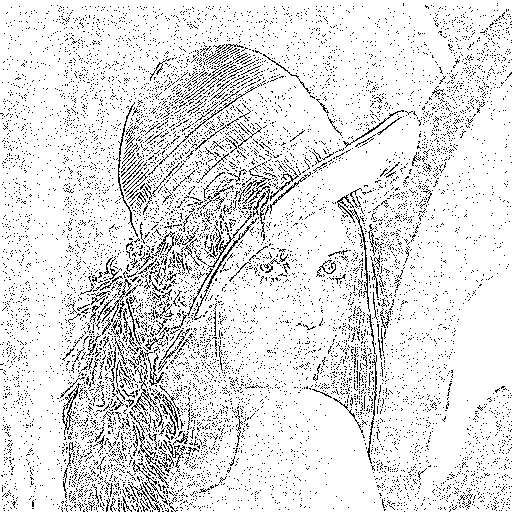

In [ ]:
threshold = 15
kernel_a = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
a = zero_crossing( laplacian(img, kernel_a, threshold) )
cv2.imwrite('a.laplacian.type1.threshold=15.bmp', a)
cv2_imshow(a)

##(b) Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1): threshold = 15

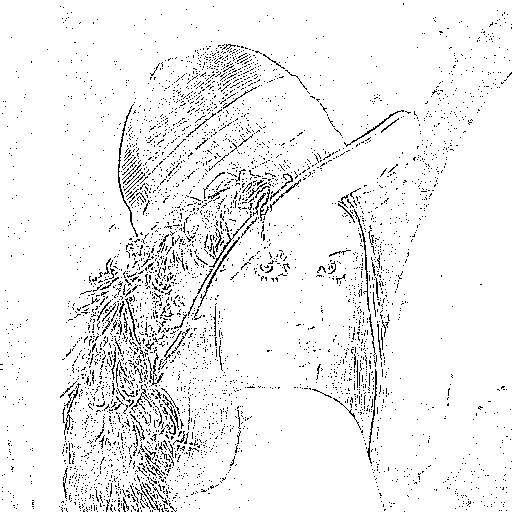

In [ ]:
threshold_b = 15
kernel_b = np.array([[1., 1, 1],[1, -8, 1],[1, 1, 1]]) / 3
b = zero_crossing( laplacian(img, kernel_b, threshold_b) )
cv2.imwrite('b.laplacian.type2.threshold=15.bmp', b)
cv2_imshow(b)

##(c) Minimum variance Laplacian: 20

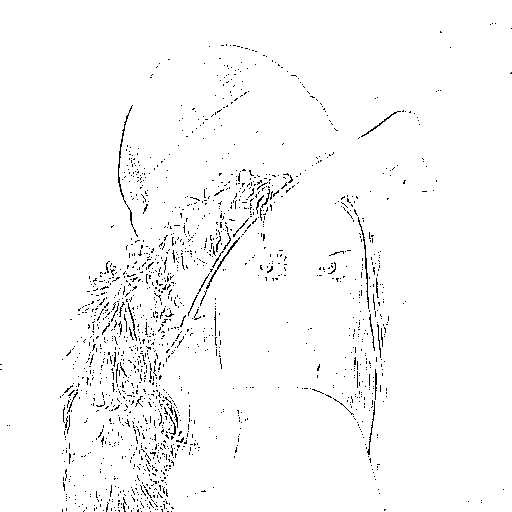

In [ ]:
threshold_c = 20
kernel_c = np.array([[2., -1, 2],[-1, -4, -1],[2, -1, 2]]) / 3
c = zero_crossing( laplacian(img, kernel_c, threshold_c) )
cv2.imwrite('c.minimum_variance_laplacian.threshold=20.bmp', c)
cv2_imshow(c)

##(d) Laplace of Gaussian: 3000

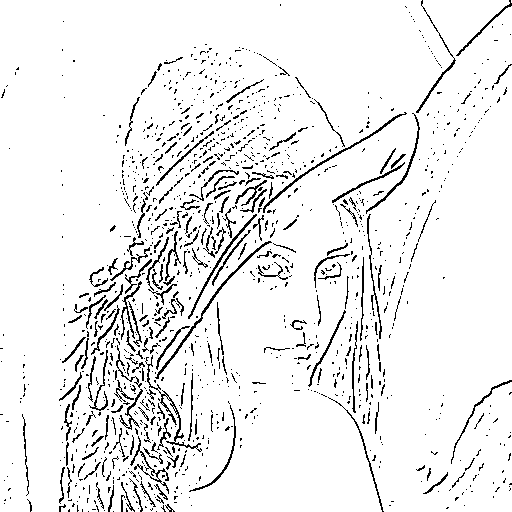

In [ ]:
kernel_d = np.array([
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]
        ])

threshold_d =3000
d = zero_crossing( laplacian(img, kernel_d, threshold_d) )
cv2.imwrite('d.laplace_of_gaussian.threshold=3000.bmp', d)
cv2_imshow(d)

##(e) Difference of Gaussian: 1

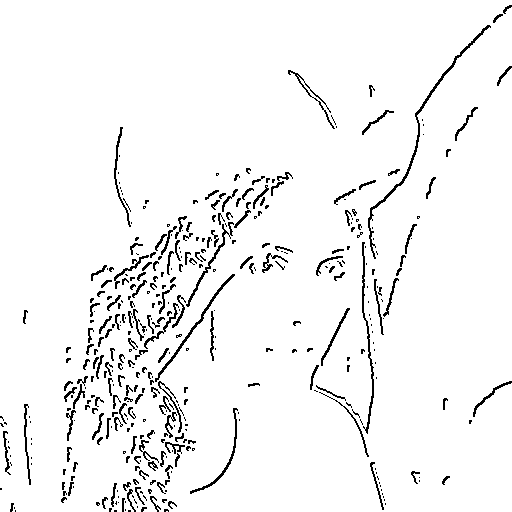

In [ ]:
kernel_e = np.array([
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
        ])
threshold_e =1
e = zero_crossing( laplacian(img, kernel_e, threshold_e) )
cv2.imwrite('e.difference_of_gaussian.threshold=1.bmp', e)
cv2_imshow(e)